# Heatmap
- Displays the Effect Size of hidden features accross all 25 encoders

    Encoders 1 to 25
    --> 
     _ _ _ _ _ _ _ _ _
v    | 
e    |
c    |
1024 |

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from helper_scripts.Constants import *
from matplotlib.colors import ListedColormap

# 1) Load in Dialect, Encoder, Token Data

In [17]:
PATH_TO_ALL_CD = "../data/numpy/CDs_D_E_T.npy"
CDs_D_E_T = np.load(PATH_TO_ALL_CD)

# 2) Accumulate Sum of Cohen's D for each encoder and each feature

In [18]:
# CDs_D_E_T = np.zeros((25,1024,8,tn))
acc_effect_size_by_dialect = dict()

for dialect in range(Constants.TIMIT.NUM_DIALECTS):
    all_effect_sizes = CDs_D_E_T[:, :, dialect, :]
    significant_mask = np.abs(all_effect_sizes) > 0.5
    acc_effect_size_count = np.sum(significant_mask, axis=2)
    acc_effect_size_by_dialect[dialect] = acc_effect_size_count

# 3) Plot

In [19]:
# fig, axs = plt.subplots(2, 4, layout="constrained")
# for row in range(2):
#     for col in range(4):
#         ax = axs[row, col]
#         ax.plot(np.arange(0,25), np.arange(25,25))


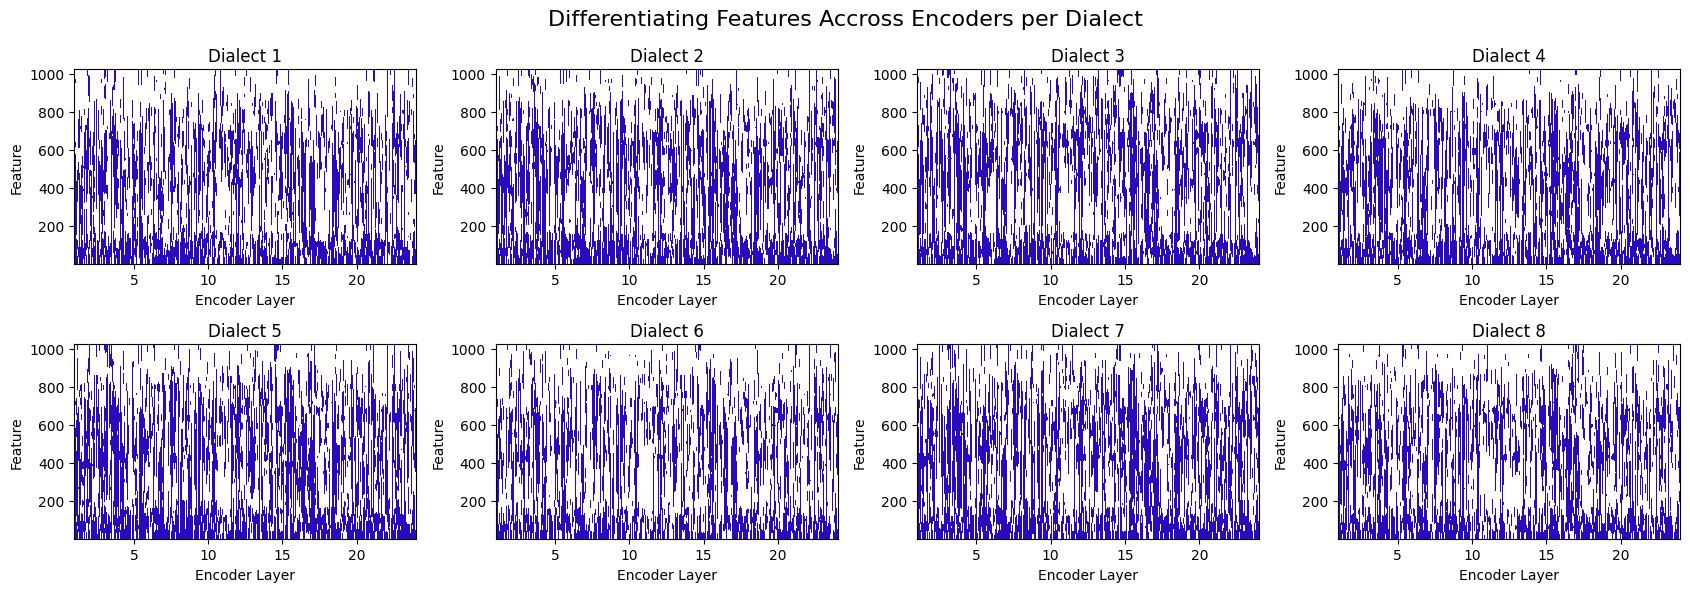

In [38]:
# Step 1) Generate axes (Shift indexes up by 1)
encoder_axis = np.arange(1, 25)
effect_size_axis = np.arange(1, 1025)

# Step 2) Generate Grid structure
# 14 by 6 is a generic size, change as needed
figs, axs = plt.subplots(2, 4, figsize=(17, 6))

# Step 3) Plot Data and Label Axis
plot_num = 0
for row in range(2):
    for col in range(4):
        # Setup Subplot
        cur_plot = axs[row, col]
        
        # Labelling
        cur_plot.set_title(f"Dialect {plot_num+1}")
        cur_plot.set_xlabel("Encoder Layer")
        cur_plot.set_ylabel("Feature")
        
        cmap_colors = [(1, 1, 1), (215,245,66  )]  # White for zero, Blue for non-zero
        cmap = ListedColormap(cmap_colors)

        # Plot Data
        cur_plot.imshow(
            acc_effect_size_by_dialect[plot_num],
            aspect="auto",
            extent=[encoder_axis.min(), encoder_axis.max(), effect_size_axis.min(), effect_size_axis.max()],
            cmap=cmap
        )

        plot_num += 1

figs.suptitle("Differentiating Features Accross Encoders per Dialect", fontsize=16)
plt.tight_layout()